In [12]:
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract
import cv2

In [13]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [14]:
def magiccolor1(image):
    thresh, im_bw = cv2.threshold(image, 140, 255 , cv2.THRESH_BINARY)
    return im_bw

def magiccolor2(image):
    thresh= cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

In [5]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [15]:
def display(im_paths):
    fig = plt.figure(figsize=(20,20))
    rows = 1
    cols = len(im_paths)

    for i in range(len(im_paths)):
        im_path = im_paths[i]
        fig.add_subplot(rows, cols, i+1)
        plt.title(im_path, fontsize =5)
        plt.axis("off")
        plt.imshow(cv2.imread(im_path))

In [16]:
img_paths = ["../imgs/test_img1.jpg", "../imgs/test_img2.jpg"]

TypeError: Image data of dtype object cannot be converted to float

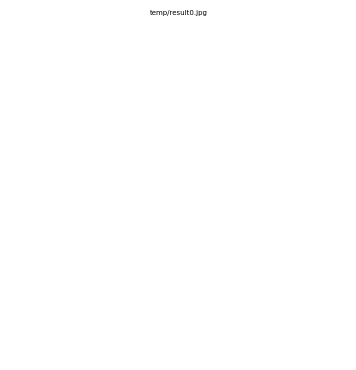

In [17]:
for img_path in img_paths:
    # code berantakan lol
    img = cv2.imread(img_path)
    img_gray = grayscale(img)
    img_bw = magiccolor2(img_gray)
    img_nonoise = noise_removal(img_bw)
    img_nonoise2 = cv2.fastNlMeansDenoising(img_bw, 11, 30, 9)
    
    results = [img, img_gray, img_bw, img_nonoise]
    # results = [img, img_nonoise, img_nonoise2]
    results_paths = []
    for i in range(len(results)):
        results_paths.append("temp/result"+str(i)+".jpg")
        cv2.imwrite(results_paths[i], results[i])
    display(results_paths)
    print(pytesseract.image_to_string(results_paths[-1], lang="ind"))

In [9]:
print(pytesseract.image_to_string("../imgs/test_img3.jpg", lang="ind"))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [10]:
print(pytesseract.image_to_string("../imgs/test_img1.jpg", lang="ind"))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.